In [5]:
!pip install torchsummary
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
transform = transforms.Compose([transforms.Resize(299),
                                transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root='../input/100-bird-species/train',transform=transform)

test_dataset = torchvision.datasets.ImageFolder(root='../input/100-bird-species/test',
                                            transform=transform)

In [7]:
total_class = train_dataset.classes
train_class = train_dataset.class_to_idx
test_class = test_dataset.class_to_idx
# for key in train_dataset.classes:
#     print(train_class[key], test_class[key])

idx_to_classes = {}
for classes in train_class:
    idx_to_classes[train_class[classes]] = classes
print(idx_to_classes)
print(len(total_class))

{0: 'AFRICAN CROWNED CRANE', 1: 'AFRICAN FIREFINCH', 2: 'ALBATROSS', 3: 'ALEXANDRINE PARAKEET', 4: 'AMERICAN AVOCET', 5: 'AMERICAN BITTERN', 6: 'AMERICAN COOT', 7: 'AMERICAN GOLDFINCH', 8: 'AMERICAN KESTREL', 9: 'AMERICAN PIPIT', 10: 'AMERICAN REDSTART', 11: 'ANHINGA', 12: 'ANNAS HUMMINGBIRD', 13: 'ANTBIRD', 14: 'ARARIPE MANAKIN', 15: 'ASIAN CRESTED IBIS', 16: 'BALD EAGLE', 17: 'BALI STARLING', 18: 'BALTIMORE ORIOLE', 19: 'BANANAQUIT', 20: 'BANDED BROADBILL', 21: 'BAR-TAILED GODWIT', 22: 'BARN OWL', 23: 'BARN SWALLOW', 24: 'BARRED PUFFBIRD', 25: 'BAY-BREASTED WARBLER', 26: 'BEARDED BARBET', 27: 'BELTED KINGFISHER', 28: 'BIRD OF PARADISE', 29: 'BLACK FRANCOLIN', 30: 'BLACK SKIMMER', 31: 'BLACK SWAN', 32: 'BLACK TAIL CRAKE', 33: 'BLACK THROATED WARBLER', 34: 'BLACK VULTURE', 35: 'BLACK-CAPPED CHICKADEE', 36: 'BLACK-NECKED GREBE', 37: 'BLACK-THROATED SPARROW', 38: 'BLACKBURNIAM WARBLER', 39: 'BLUE GROUSE', 40: 'BLUE HERON', 41: 'BOBOLINK', 42: 'BORNEAN BRISTLEHEAD', 43: 'BORNEAN LEAFBIRD'

In [8]:
train_data = torch.utils.data.DataLoader(train_dataset,
                                         batch_size=32,
                                         shuffle=True)

test_data = torch.utils.data.DataLoader(test_dataset,
                                        batch_size=32,
                                        shuffle=False)

tensor([[[0.2627, 0.2627, 0.2627,  ..., 0.2588, 0.2588, 0.2588],
         [0.2627, 0.2588, 0.2588,  ..., 0.2588, 0.2588, 0.2588],
         [0.2627, 0.2588, 0.2588,  ..., 0.2588, 0.2588, 0.2588],
         ...,
         [0.0353, 0.0471, 0.0431,  ..., 0.3176, 0.3569, 0.3569],
         [0.1098, 0.1255, 0.1373,  ..., 0.5412, 0.6000, 0.6000],
         [0.2314, 0.2510, 0.2824,  ..., 0.7529, 0.8078, 0.8118]],

        [[0.4824, 0.4824, 0.4824,  ..., 0.4784, 0.4784, 0.4784],
         [0.4824, 0.4784, 0.4784,  ..., 0.4784, 0.4784, 0.4784],
         [0.4824, 0.4784, 0.4784,  ..., 0.4784, 0.4784, 0.4784],
         ...,
         [0.0941, 0.1059, 0.1137,  ..., 0.3373, 0.3804, 0.3843],
         [0.2039, 0.2196, 0.2392,  ..., 0.5647, 0.6314, 0.6392],
         [0.3451, 0.3686, 0.4078,  ..., 0.7804, 0.8471, 0.8627]],

        [[0.8235, 0.8235, 0.8235,  ..., 0.8118, 0.8118, 0.8118],
         [0.8235, 0.8196, 0.8196,  ..., 0.8118, 0.8118, 0.8118],
         [0.8235, 0.8196, 0.8196,  ..., 0.8118, 0.8118, 0.

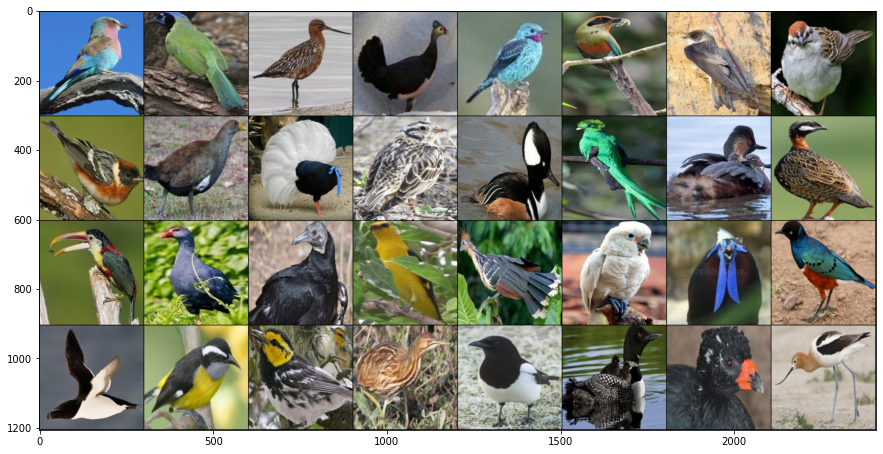

In [9]:
idx,(img,label) = next(enumerate(train_data))
print(img[0])
idx1,(img1,label1) = next(enumerate(train_data))
print("Image Size {}".format(img[0].size()))
print(label[0])
print("Label Size {}".format(label[0].size()))
print("Bird Species {}".format(idx_to_classes[label[0].item()]))
plt.figure(figsize=(15,15))
plt.imshow(torchvision.utils.make_grid(img).permute(1,2,0))
print('(Ground Truth,Prediction) : ',' '.join('%s:(%s,%s)'%(j+1,idx_to_classes[label[j].item()],idx_to_classes[label1[j].item()]) for j in range(img.shape[0])))

In [10]:
def show_batch_images(img,ground_label,classes,result_label=None,cols=8):
    """
    img : (B,C,H,W)
    ground_label : (B), ground truth
    result_label : (B), result label from model
    classes : index by label value
    col : no of images in a column
    """
    if result_label is not None:
        print('Title Format : Prediction[Ground Truth]')
    else:
        print('Title Format : Ground Truth')
    batch_size = img.shape[0]
    rows = (batch_size + cols - 1)//cols
    fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(15,15))
    for i in range(batch_size):
        plt.subplot(rows,cols,i+1)
        plt.imshow(img[i].permute(1,2,0))
        if result_label is not None:
            plt.title(classes[result_label[i].item()] + "[" + classes[ground_label[i].item()] + "]")
        else:
            plt.title(classes[ground_label[i].item()])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
class EntryflowConv(nn.Module):
    """
    First Part in Entry Flow having only Convolution layers.
    In Xception:
        in_channel = 3
        out_channel = 64
    """
    def __init__(self,in_channel,out_channel):
        super(EntryflowConv,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=in_channel,out_channels=32,kernel_size=3,stride=2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=out_channel,kernel_size=3)
        self.bnm1 = nn.BatchNorm2d(32)
        self.bnm2 = nn.BatchNorm2d(out_channel)
        self.relu = nn.ReLU()

    def forward(self,x):
        # 299x299x3
        x = self.conv1(x)
        x = self.bnm1(x)
        x = self.relu(x)
        # 149x149x32

        x = self.conv2(x)
        x = self.bnm2(x)
        x = self.relu(x)
        # 147x147x64

        return x

In [12]:
class DepthwiseSeparable(nn.Module):
    """
    Depthwise Separable Convolution is Depthwise Convolution + Pointwise Convolution.
        Depthwise Convolution : Convolution over each channel independently
            Divide input channels into "in_channel" groups and then apply convolution over each
            Group independently : Depth is not used
        Pointwise Convolution : Normal Convolution with kernel Size (1,1)
            Only depth Used.

    In Xception Architecture the Order of operation is different:
        Pointwise Convolution + Depthwise Convolution

    groups : No of groups the input channel should be divided into
             For depthwise convolution = in_channel
    padding = default: "same" (1 for kernel_size = 3)
    """
    def __init__(self,in_channel,out_channel,kernel_size,stride=1,padding=1):
        super(DepthwiseSeparable,self).__init__()

        self.pointwise = nn.Conv2d(in_channels=in_channel,out_channels=out_channel,kernel_size=1)
        self.depthwise = nn.Conv2d(in_channels=out_channel,out_channels=out_channel,kernel_size=kernel_size,stride=stride,padding=padding,groups=out_channel)

    def forward(self,x):
        x = self.pointwise(x)
        x = self.depthwise(x)

        return x

In [13]:
class EntryflowSeparable(nn.Module):
    """
    This part contains depthwise separable convolutions and is repeated 3 times in original implementation.

        in_channel, out_channel : Different for each repetition
        pool_padding: default :1 , Padding value for max_pool layer
        kernel_size = 3 : For all repetitions
        relu_extra : bool, default : false : Whether or not put a relu layer in the beginning
    """
    def __init__(self,in_channel,out_channel,pool_padding=1,relu_extra=False):
        super(EntryflowSeparable,self).__init__()

        # 1st branch
        self.sepconv1 = DepthwiseSeparable(in_channel=in_channel,out_channel=out_channel,kernel_size=3)
        self.bnm1 = nn.BatchNorm2d(out_channel)
        self.sepconv2 = DepthwiseSeparable(in_channel=out_channel,out_channel=out_channel,kernel_size=3)
        self.bnm2 = nn.BatchNorm2d(out_channel)
        self.maxpool = nn.MaxPool2d(kernel_size=3,stride=2,padding=pool_padding)
        self.relu = nn.ReLU()
        self.relu_extra = relu_extra

        # 2nd branch (left)
        self.conv = nn.Conv2d(in_channels=in_channel,out_channels=out_channel,kernel_size=1,stride=2)
        self.bnmy = nn.BatchNorm2d(out_channel)

    def forward(self,x):
        # 2nd branch
        y = self.conv(x)
        y = self.bnmy(y)

        # 1st branch
        if self.relu_extra:
            x = self.relu(x)
        x = self.sepconv1(x)
        x = self.bnm1(x)
        x = self.relu(x)

        x = self.sepconv2(x)
        x = self.bnm2(x)
        x = self.maxpool(x)

        # Add two branch
        x = x + y
        return x

In [14]:
class EntryFlow(nn.Module):
    """
    Entry Flow Part of Xception :

        EntryflowConv + 3 x EntryflowSeparable
        in_channel = 3
        out_channel = 728
    """
    def __init__(self,in_channel=3):
        super(EntryFlow,self).__init__()
        self.conv = EntryflowConv(in_channel=in_channel,out_channel=64)
        self.sep1 = EntryflowSeparable(in_channel=64,out_channel=128)
        self.sep2 = EntryflowSeparable(in_channel=128,out_channel=256,relu_extra=True)
        self.sep3 = EntryflowSeparable(in_channel=256,out_channel=728,relu_extra=True)

    def forward(self,x):
        x = self.conv(x)
        x = self.sep1(x)
        x = self.sep2(x)
        x = self.sep3(x)

        return x

In [15]:
class MiddleflowSeperable(nn.Module):
    """
    This part contains depthwise separable convolutions and is repeated 3 times in original implementation.

        in_channel, out_channel : Both of them are actually equal!
        kernel_size = 3 : For all repetitions
    """
    def __init__(self,in_channel,out_channel):
        super(MiddleflowSeperable,self).__init__()

        # 1st branch
        self.sep1 = DepthwiseSeparable(in_channel=in_channel,out_channel=out_channel,kernel_size=3)
        self.sep2 = DepthwiseSeparable(in_channel=out_channel,out_channel=out_channel,kernel_size=3)
        self.sep3 = DepthwiseSeparable(in_channel=out_channel,out_channel=out_channel,kernel_size=3)
        self.bnm = nn.BatchNorm2d(out_channel)
        self.relu = nn.ReLU()

    def forward(self,x):
        # 2nd branch
        y = x

        # 1st branch
        x = self.relu(x)
        x = self.sep1(x)
        x = self.bnm(x)

        x = self.relu(x)
        x = self.sep2(x)
        x = self.bnm(x)

        x = self.relu(x)
        x = self.sep3(x)
        x = self.bnm(x)

        # Add two branch
        x = x + y
        return x

In [16]:
class MiddleFlow(nn.Module):
    """
    This is the Middle Flow part -
        MiddleFlowSeperable is repeated 8 times 
    
    input_size = (728,19,19)
    output_size = (728,19,19)       
    """
    def __init__(self):
        super(MiddleFlow,self).__init__()
        self.sep = MiddleflowSeperable(in_channel=728,out_channel=728)
    def forward(self,x):
        for i in range(8):
            x = self.sep(x)
        return x

In [17]:
class ExitflowSeperable(nn.Module):
    """
    This part contains depthwise separable convolutions and is repeated 2 times in original implementation with max pool layer.

        in_channel, out_channel : Both of them are different
        kernel_size = 3 : For all repetitions
        max pool kernel_size :3 with stride:2
    """
    def __init__(self,in_channel,out_channel,padding=1):
        super(ExitflowSeperable,self).__init__()

        #1st branch
        self.sep1 = DepthwiseSeparable(in_channel=in_channel,out_channel=in_channel,kernel_size=3)
        self.sep2 = DepthwiseSeparable(in_channel=in_channel,out_channel=out_channel,kernel_size=3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=3,stride=2,padding=padding)
        
        #2nd branch
        self.conv = nn.Conv2d(in_channels=in_channel,out_channels=out_channel,kernel_size=1,stride=2)
        
        self.bnm1 = nn.BatchNorm2d(in_channel)
        self.bnm2 = nn.BatchNorm2d(out_channel)

    def forward(self,x):

        #2nd branch 
        y = self.conv(x)
        y = self.bnm2(y)

        #1st branch
        x = self.relu(x)
        x = self.sep1(x)
        x = self.bnm1(x)
        x = self.relu(x)
        x = self.sep2(x)
        x = self.bnm2(x)
        x = self.pool(x)

        return x+y    

In [18]:
class ExitFlow(nn.Module):
    """
    This part contains ExitFlowSeperable part with 2 different depthwise seperable convolutions followed by Global Avgerage Pool(Avg Pool of kernel size 10) and connecting with output layer

    input_size  :(728,19,19)
    output_size :(output_layer)
    """
    def __init__(self,in_channel=728,out_channel=1024,first_layer=1536,second_layer=2048,output_layer=1000):
        super(ExitFlow,self).__init__()
        self.block = ExitflowSeperable(in_channel=in_channel,out_channel=out_channel)
        self.sep1 = DepthwiseSeparable(in_channel=1024,out_channel=first_layer,kernel_size=3)
        self.bnm1 = nn.BatchNorm2d(first_layer)
        self.sep2 = DepthwiseSeparable(in_channel=first_layer,out_channel=second_layer,kernel_size=3)
        self.bnm2 = nn.BatchNorm2d(second_layer)
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=10)
        self.flatten = nn.Flatten()
        self.output = nn.Linear(in_features=second_layer,out_features=output_layer)

    def forward(self,x):
        x = self.block(x)
        x = self.sep1(x)
        x = self.bnm1(x)
        x = self.relu(x)
        x = self.sep2(x)
        x = self.bnm2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.output(x)
        return x

In [19]:
class Xception(nn.Module):
    """
        Now, this is the final part where we merge all the flow i.e. entry, middle and exit flow to get the Xception Model
    """
    def __init__(self):
        super(Xception,self).__init__()
        self.entry = EntryFlow()
        self.mid = MiddleFlow()
         # Sorry for Wrong size of Output layer, Changing it means training for 3 more hours xD
        self.exit = ExitFlow(output_layer=265)
    def forward(self,x):
        x = self.entry(x)
        x = self.mid(x)
        x = self.exit(x)
        return x

In [20]:
model = Xception()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.03)
if torch.cuda.is_available():
  model = model.cuda()
summary(model,input_size=(3,299,299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             896
       BatchNorm2d-2         [-1, 32, 149, 149]              64
              ReLU-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 64, 147, 147]          18,496
       BatchNorm2d-5         [-1, 64, 147, 147]             128
              ReLU-6         [-1, 64, 147, 147]               0
     EntryflowConv-7         [-1, 64, 147, 147]               0
            Conv2d-8          [-1, 128, 74, 74]           8,320
       BatchNorm2d-9          [-1, 128, 74, 74]             256
           Conv2d-10        [-1, 128, 147, 147]           8,320
           Conv2d-11        [-1, 128, 147, 147]           1,280
DepthwiseSeparable-12        [-1, 128, 147, 147]               0
      BatchNorm2d-13        [-1, 128, 147, 147]             256
             ReLU-14        [-1, 128, 

EPOCH: 1 AVERAGE TRAINING LOSS = 4.670243989594294
EPOCH: 1 TRAINING ACCURACY = 0.06698400105778131
EPOCH: 1 AVERAGE TEST LOSS = 4.324409865197682
EPOCH: 1 TESTING ACCURACY = 0.09283018867924528
------------------------------------
EPOCH: 2 AVERAGE TRAINING LOSS = 3.155983313186923
EPOCH: 2 TRAINING ACCURACY = 0.2705804574904139
EPOCH: 2 AVERAGE TEST LOSS = 3.2908496998605274
EPOCH: 2 TESTING ACCURACY = 0.2369811320754717
------------------------------------
EPOCH: 3 AVERAGE TRAINING LOSS = 2.1005297356652326
EPOCH: 3 TRAINING ACCURACY = 0.49448631495438317
EPOCH: 3 AVERAGE TEST LOSS = 2.493296200320834
EPOCH: 3 TESTING ACCURACY = 0.4143396226415094
------------------------------------
EPOCH: 4 AVERAGE TRAINING LOSS = 1.4593969780680693
EPOCH: 4 TRAINING ACCURACY = 0.6390321301071004
EPOCH: 4 AVERAGE TEST LOSS = 2.0622468250138417
EPOCH: 4 TESTING ACCURACY = 0.510943396226415
------------------------------------
EPOCH: 5 AVERAGE TRAINING LOSS = 1.0644510133970408
EPOCH: 5 TRAINING ACCU

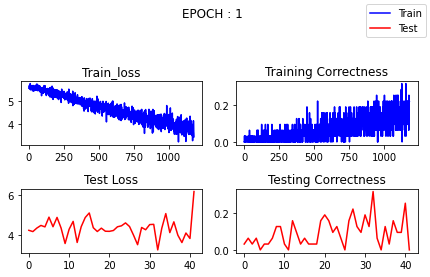

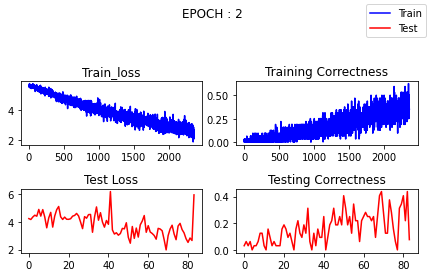

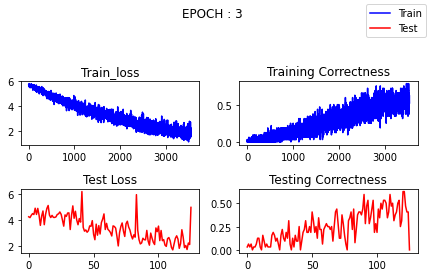

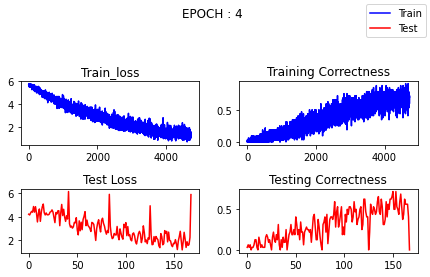

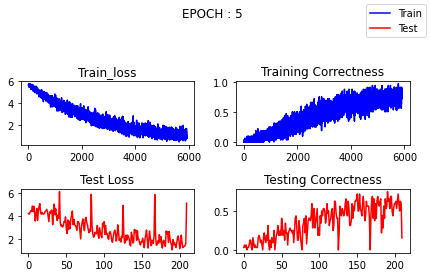

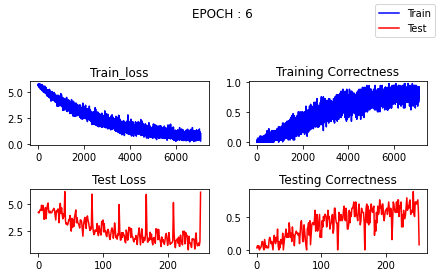

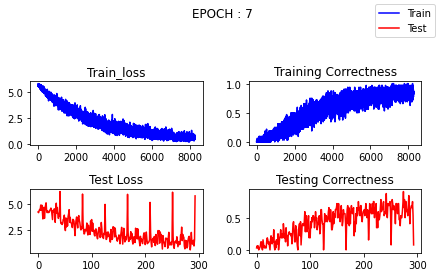

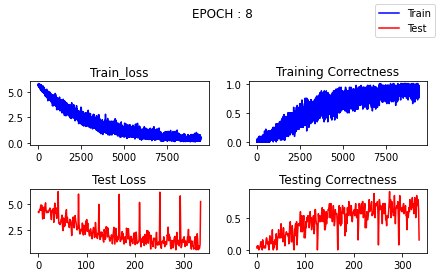

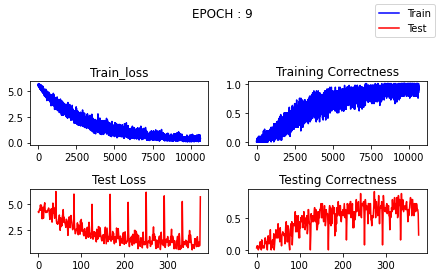

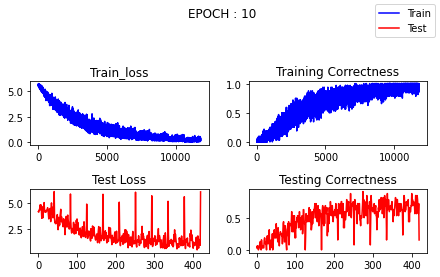

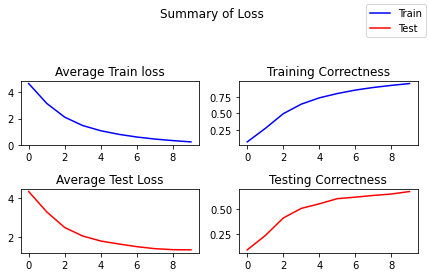

In [21]:
epochs = 10
train_loss = []
train_acc = []
test_loss = []
test_acc = []

batch_train_loss = []
batch_train_acc = []
batch_test_loss = []
batch_test_acc = []
for epoch in range(epochs):
  correct = 0
  iterations = 0
  iter = 0.0

#   print('Epoch: ' + str(epoch+1) + ' Training Loss')
  for batch , (images,labels) in enumerate(train_data):

    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    outputs = model(images)

    loss = loss_function(outputs,labels)
    # print('Epoch: ' + str(epoch+1) + ' Batch: ' + str(batch) + ' loss: ' + str(loss))
    batch_train_loss.append(loss.item())

    iter = iter + loss.item()

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    _,pred = torch.max(outputs,1)
    batch_correct = (labels==pred).sum().item()
    batch_train_acc.append(batch_correct/len(labels))
    correct = correct + batch_correct

    iterations +=1
  train_loss.append(iter/iterations)
  train_acc.append(correct/len(train_dataset))
  print('EPOCH: ' + str(epoch+1) + ' AVERAGE TRAINING LOSS = ' + str(train_loss[epoch]))
  print('EPOCH: ' + str(epoch+1) + ' TRAINING ACCURACY = ' + str(train_acc[epoch]))


  correct = 0
  iter = 0.0
  iterations = 0
#   print('Epoch: ' + str(epoch+1) + ' Test Loss')
  with torch.no_grad():
    for batch , (images,labels) in enumerate(test_data):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)

        _,pred = torch.max(outputs,1)
        batch_correct = (labels==pred).sum().item()
        correct = correct + batch_correct
        batch_test_acc.append(batch_correct/len(labels))


        loss = loss_function(outputs,labels)
        batch_test_loss.append(loss.item())
        # print('Epoch: ' + str(epoch+1) + ' Batch: ' + str(batch) + 'loss: ' + str(loss))
        iter = iter + loss.item()
        iterations += 1

    test_loss.append(iter/iterations)
    test_acc.append(correct/len(test_dataset))
    print('EPOCH: ' + str(epoch+1) + ' AVERAGE TEST LOSS = ' + str(test_loss[epoch]))
    print('EPOCH: ' + str(epoch+1) + ' TESTING ACCURACY = ' + str(test_acc[epoch]))
    print('------------------------------------')


    fig,((btl,btc),(bl,bc)) = plt.subplots(2,2)
    btl.plot(batch_train_loss,label='Train',color='b')
    btl.set_title('Train_loss')
    bl.plot(batch_test_loss,label='Test',color='r')
    bl.set_title('Test Loss')
    btc.plot(batch_train_acc,color='b')
    bc.plot(batch_test_acc,color='r')
    btc.set_title('Training Correctness')
    bc.set_title('Testing Correctness')
    fig.legend()
    fig.suptitle('EPOCH : ' +  str(epoch+1))
    fig.tight_layout(rect=[0, 0.03, 1, 0.90])
    fig.show()

fig,((btl,btc),(bl,bc)) = plt.subplots(2,2)
btl.plot(train_loss,label='Train',color='b')
btl.set_title('Average Train loss')
bl.plot(test_loss,label='Test',color='r')
bl.set_title('Average Test Loss')
btc.plot(train_acc,color='b')
bc.plot(test_acc,color='r')
btc.set_title('Training Correctness')
bc.set_title('Testing Correctness')
fig.legend()
fig.suptitle('Summary of Loss')
fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.show()

In [22]:
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   93233 KB |    9707 MB |  265902 GB |  265902 GB |\n|       from large pool |   87767 KB |    9701 MB |  265770 GB |  265770 GB |\n|       from small pool |    5465 KB |       6 MB |     132 GB |     132 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |   93233 KB |    9707 MB |  265902 GB |  265902 GB |\n|       from large pool |   87767 KB |    9701 MB |